In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

0.9425981873111783
0.9411764705882353


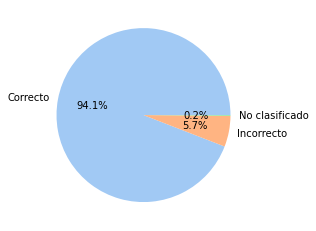

         category  count
0        Correcto    624
1      Incorrecto     38
2  No clasificado      1


In [4]:
data = pd.read_csv('data/transactions_random_sample_13feb17.csv', sep=',', index_col=False) # here the data

data_wo_noclass = data.loc[data['category_name'] != 'Sin categoría'].reset_index(drop=True)
print(data_wo_noclass['similarity'].sum()/len(data_wo_noclass))
print(data['similarity'].sum()/len(data))

all_resume = {
    'category' : ['Correcto', 'Incorrecto', 'No clasificado'], 
    'count': [data_wo_noclass['similarity'].sum(), len(data_wo_noclass.loc[data_wo_noclass['similarity'] == 0]), len(data.loc[data['category_name']=='Sin categoría'])]
    } 
all_resume_df = pd.DataFrame.from_dict(all_resume)

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(all_resume_df['count'], labels=all_resume_df['category'], colors = colors, autopct='%1.1f%%')

plt.show()
print(all_resume_df)

                           precision    recall  f1-score   support

       Ahorro e Inversión       1.00      1.00      1.00        47
   Automóvil y Transporte       0.75      1.00      0.86         6
      Cuentas & Servicios       0.43      1.00      0.61        10
          Entretenimiento       1.00      1.00      1.00         4
       Gastos Financieros       0.76      1.00      0.86        16
          Hogar y Familia       0.00      0.00      0.00         1
            Pago Créditos       0.80      0.89      0.84         9
             Restaurantes       0.93      0.59      0.72        22
        Salud y Bienestar       0.50      0.13      0.21        15
                 Shopping       0.57      0.67      0.62        12
            Sin categoría       0.00      0.00      0.00         1
            Supermercados       0.86      0.86      0.86        14
Transf. entre mis Cuentas       1.00      1.00      1.00        16
 Transferencias y Retiros       1.00      0.97      0.98     

C:\Users\joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.p

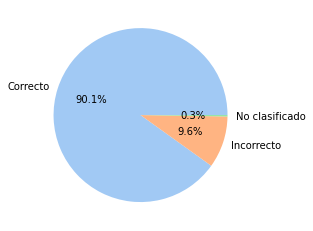

In [5]:
expense = data.loc[data['amount'] < 0].reset_index(drop=True)
# expense = expense.loc[expense['nombre'] != 'No clasificado']
report_expense = classification_report(expense['category_name'], expense['true_category'])
print(report_expense)
expense_wo_noclass = expense.loc[expense['category_name'] != 'Sin categoría'].reset_index(drop=True)
expense_resume = {
    'category' : ['Correcto', 'Incorrecto', 'No clasificado'], 
    'count': [expense_wo_noclass['similarity'].sum(), len(expense_wo_noclass.loc[expense_wo_noclass['similarity'] == 0]), len(expense.loc[expense['category_name']=='Sin categoría'])]
    } 
expense_resume_df = pd.DataFrame.from_dict(expense_resume)

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(expense_resume_df['count'], labels=expense_resume_df['category'], colors = colors, autopct='%1.1f%%')

plt.show()

In [6]:
expense_resume_df

,category,count
0,Correcto,355
1,Incorrecto,38
2,No clasificado,1


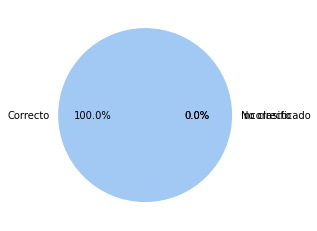

,category,count
0,Correcto,269
1,Incorrecto,0
2,No clasificado,0


In [7]:
income = data.loc[data['amount'] > 0].reset_index(drop=True)
income_wo_noclass = income.loc[income['category_name'] != 'Sin categoría'].reset_index(drop=True)
income_resume = {
    'category' : ['Correcto', 'Incorrecto', 'No clasificado'], 
    'count': [income_wo_noclass['similarity'].sum(), len(income_wo_noclass.loc[income_wo_noclass['similarity'] == 0]), len(income.loc[income['category_name']=='Sin categoría'])]
    } 
income_resume_df = pd.DataFrame.from_dict(income_resume)

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(income_resume_df['count'], labels=income_resume_df['category'], colors = colors, autopct='%1.1f%%')

plt.show()

income_resume_df